# February 2023 HIV Surveillance Update Report
A file that contains details and data about the Hiv cases on Illinois Department of Publich Health

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
%matplotlib inline
from jupyter_datatables import init_datatables_mode
from plotly.offline import download_plotlyjs, plot, init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [3]:
df1 = pd.read_csv('/Users/briankimanzi/Documents/python /webscraping/February_2023_Hiv_surveillance_update_report.csv')
df2 = pd.read_csv('/Users/briankimanzi/Documents/python /webscraping/CookCountyBreakdown.csv')
df3 = pd.read_csv('/Users/briankimanzi/Documents/python /webscraping/St._Clair_County_Breakdown.csv')

In [4]:
# copy of the data
df1_Copy = df1.copy()
df2_Copy = df2.copy()
df3_Copy = df3.copy()

In [5]:
# display all the rows and columns
pd.set_option('display.max_rows', None)

In [6]:
df1_Copy

,County,Cases Diagnosed as of 2/28/2023,Cumulative Cases Diagnosed Since 2016,2016-2023 HIV Diagnosis Rate
0,Adams,0,16,3.32
1,Alexander,1,7,12.61
2,Bond,0,2,1.58
3,Boone,2,8,2.07
4,Brown,0,3,6.05
5,Bureau,0,5,2.03
6,Calhoun,0,1,2.78
7,Carroll,0,0,0.00
8,Cass,2,10,10.46
9,Champaign,3,120,8.24


In [7]:
df2_Copy

,Health Department,Cases Diagnosed as of 2/28/2023,Cumulative Cases Diagnosed Since 2016
0,Chicago Health Dept.,62,5053
1,Cook Co. Health Dept.,27,1574
2,Evanston Health Dept.,1,52
3,Oak Park Health Dept.,2,27
4,Skokie Health Dept.,1,20


In [8]:
df3_Copy

,Health Department,Cases Diagnosed as of 2/28/2023,Cumulative Cases Diagnosed Since 2016
0,East Side Health District,1,31
1,St. Clair Co. Health Dept.,4,202


# Extrapolatory Data Analysis 
Finding ralationships on the data columns, correlation, insight

In [9]:
# returns a small numerical details about the data 
df1_Copy.describe()

,Cases Diagnosed as of 2/28/2023,Cumulative Cases Diagnosed Since 2016,2016-2023 HIV Diagnosis Rate
count,104.000000,104.000000,103.000000
mean,3.153846,184.836538,3.714951
std,18.386767,1143.267546,3.139254
min,0.000000,0.000000,0.000000
25%,0.000000,1.750000,1.855000
50%,0.000000,6.000000,2.960000
75%,1.000000,14.250000,4.640000
max,164.000000,9615.000000,17.940000


In [10]:
df1_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   County                                 104 non-null    object 
 1   Cases Diagnosed as of 2/28/2023        104 non-null    int64  
 2   Cumulative Cases Diagnosed Since 2016  104 non-null    int64  
 3   2016-2023 HIV Diagnosis Rate           103 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.4+ KB


In [11]:
rows, columns = df1_Copy.shape
print(f'Rows = {rows}, columns = {columns}')

Rows = 104, columns = 4


In [14]:
df1_Copy.isna().sum()

County                                   0
Cases Diagnosed as of 2/28/2023          0
Cumulative Cases Diagnosed Since 2016    0
2016-2023 HIV Diagnosis Rate             0
dtype: int64

In [13]:
# replacing NaN value with zero
df1_Copy['2016-2023 HIV Diagnosis Rate'] = df1_Copy['2016-2023 HIV Diagnosis Rate'].fillna(0).astype(float)

# Data Visualization
creating charts for more insight and better story telling

In [15]:
# correlation
Co_Relation = df1_Copy[df1_Copy.columns[1:]].corr()

In [16]:
round(Co_Relation,2)

,Cases Diagnosed as of 2/28/2023,Cumulative Cases Diagnosed Since 2016,2016-2023 HIV Diagnosis Rate
Cases Diagnosed as of 2/28/2023,1.00,0.99,0.44
Cumulative Cases Diagnosed Since 2016,0.99,1.00,0.45
2016-2023 HIV Diagnosis Rate,0.44,0.45,1.00


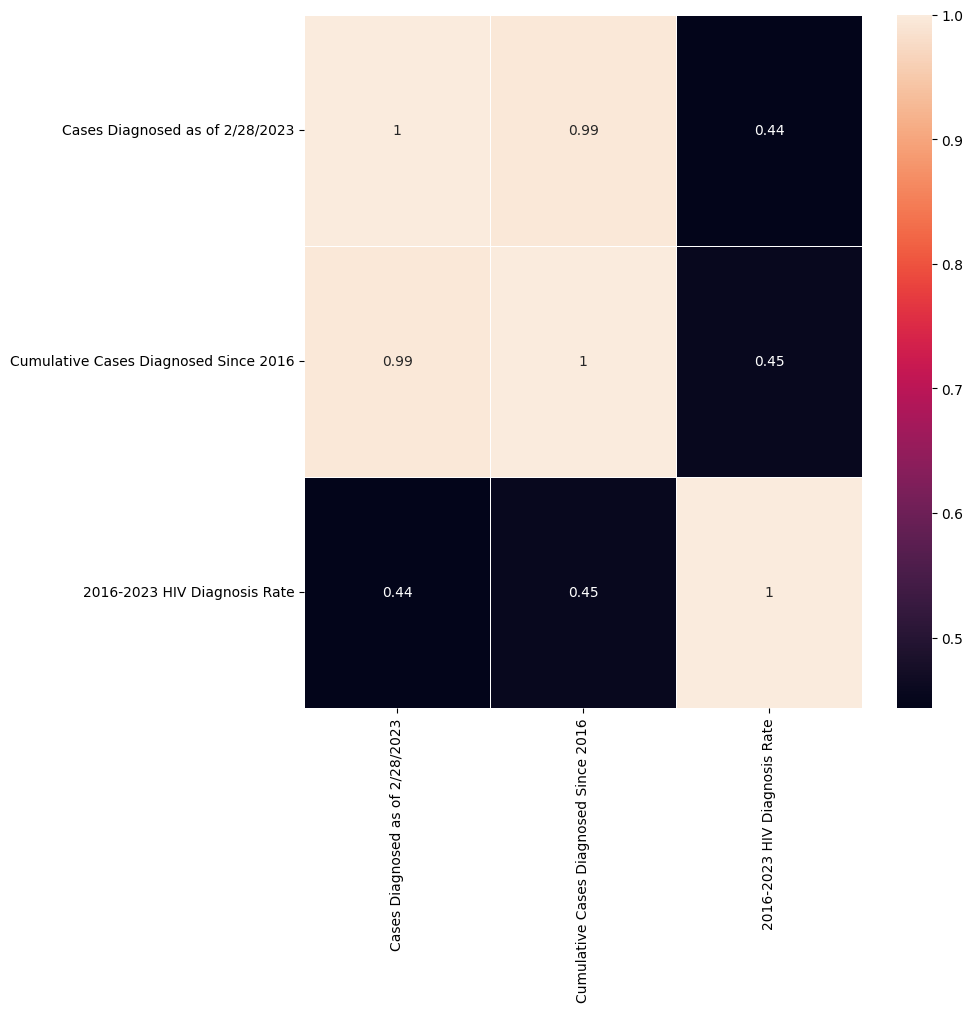

In [44]:
# correlation chart
#  px.imshow(round(Co_Relation, 2), text_auto=True, aspect="auto")
plt.subplots(figsize=(9, 9))
sns.heatmap(Co_Relation, annot=True, linewidths=.5)
plt.show()

In [18]:
# Sorting top 11 Cumulative Cases Diagnosed since 2016
CumulativeCases = df1_Copy.sort_values("Cumulative Cases Diagnosed Since 2016", ascending=False).head(10)

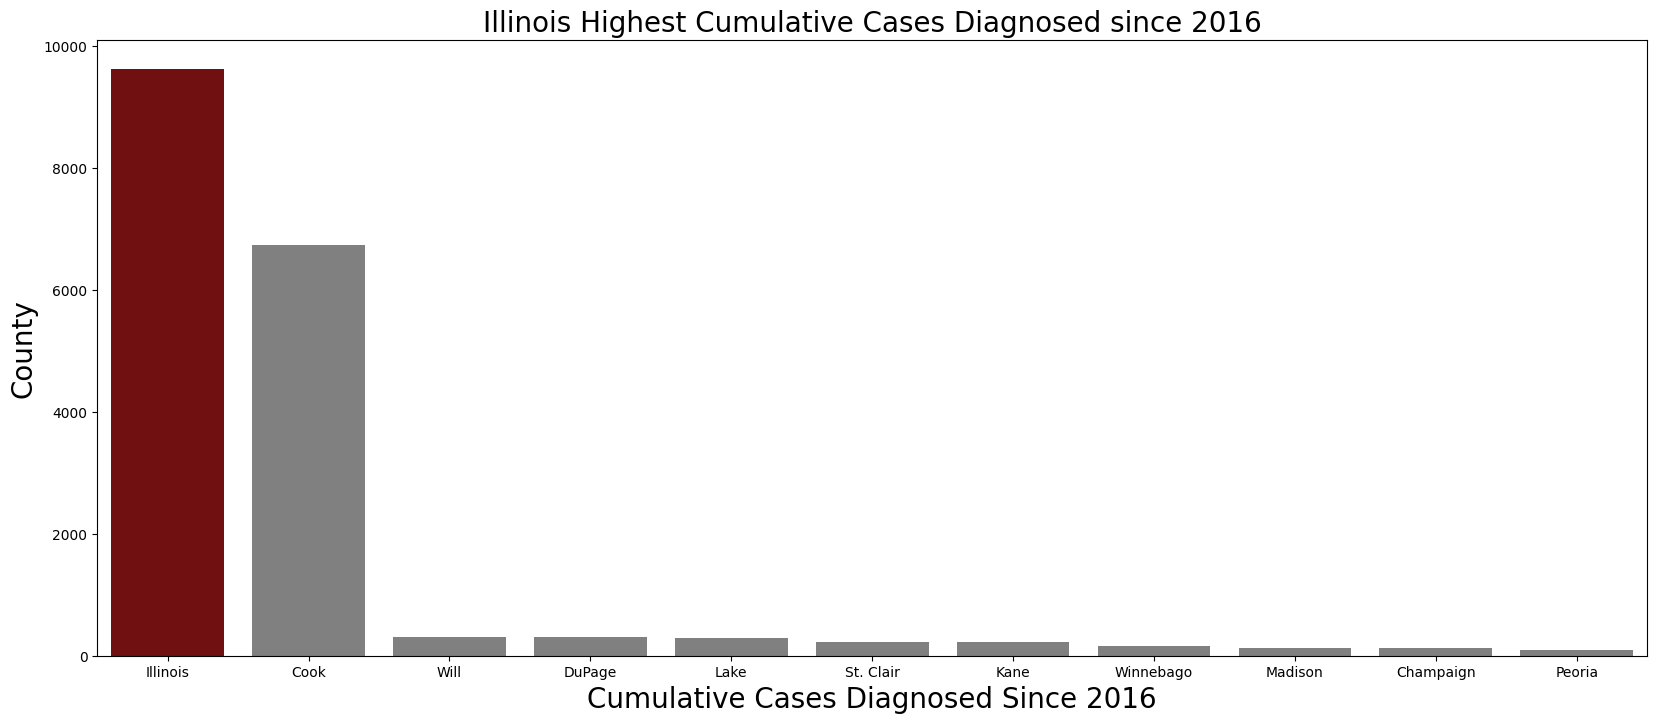

In [48]:
# Bar chart to show the highest county Cumulative Cases Diagnosed
plt.subplots(figsize=(20,8))
max_value = CumulativeCases['Cumulative Cases Diagnosed Since 2016'].max()
max_county = CumulativeCases.loc[CumulativeCases['Cumulative Cases Diagnosed Since 2016'] == max_value, 'County'].values[0]
colors = ['#800000' if county == max_county else 'grey' for county in CumulativeCases['County']]
p = sns.barplot(CumulativeCases, x = 'County', y = 'Cumulative Cases Diagnosed Since 2016', palette=colors, hue='County' )
p.set_title('Illinois Highest Cumulative Cases Diagnosed since 2016', fontsize=20)
p.set_ylabel('County', fontsize=20)
p.set_xlabel('Cumulative Cases Diagnosed Since 2016', fontsize=20)
plt.show()

In [20]:
HivDiagnosisRate = df1_Copy.sort_values('2016-2023 HIV Diagnosis Rate', ascending=False).head(10)

In [21]:
HivDiagnosisRate

,County,Cases Diagnosed as of 2/28/2023,Cumulative Cases Diagnosed Since 2016,2016-2023 HIV Diagnosis Rate
15,Cook,93,6726,17.94
76,Pulaski,0,6,13.96
1,Alexander,1,7,12.61
81,St. Clair,5,233,12.09
8,Cass,2,10,10.46
103,Illinois,164,9615,10.42
57,Macon,4,82,10.39
9,Champaign,3,120,8.24
100,Winnebago,8,163,7.79
71,Peoria,2,101,7.53


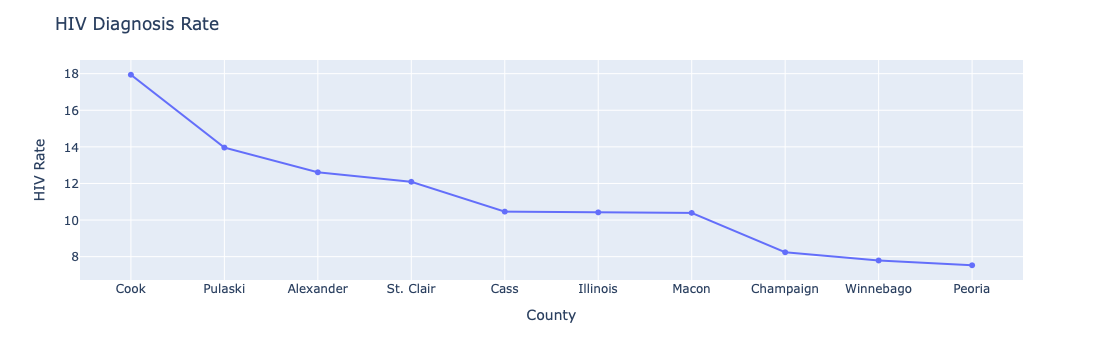

In [87]:
# plt.subplots(figsize=(20,10))
# p = sns.lineplot(data=HivDiagnosisRate, x='County', y='2016-2023 HIV Diagnosis Rate', marker='o', color='#800000')
# p.set_title('2016-2023 Hiv Diagnosis Rate By County', fontsize=20)
# p.set_ylabel('Rate', fontsize=20)
# p.set_xlabel('County', fontsize=20)
# plt.show()
fig = px.line(HivDiagnosisRate, x='County', y='2016-2023 HIV Diagnosis Rate', markers=True)
fig.update_layout(title_text='HIV Diagnosis Rate',
                 xaxis_title='County', 
                 yaxis_title = 'HIV Rate', autosize=True)
fig.show()

In [25]:
CaseDiagnosed = df1_Copy.sort_values('Cases Diagnosed as of 2/28/2023',ascending=False).head(10)

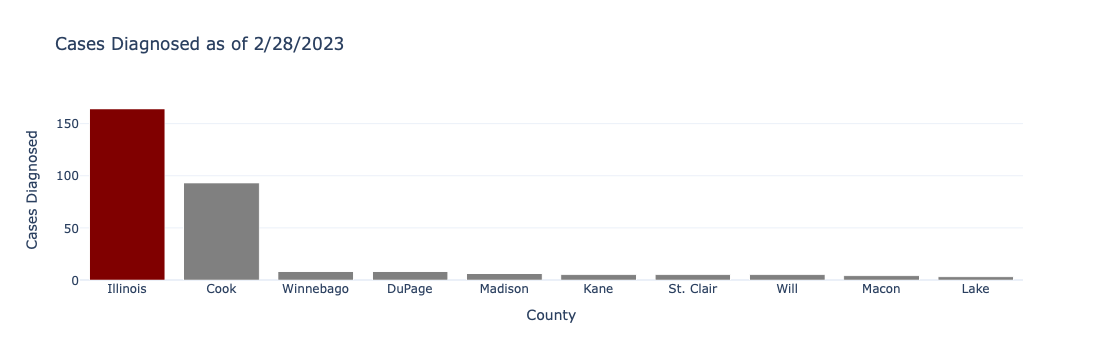

In [73]:
# bar chart using plotly
color = ['lightslategray'] * 5
color[0] = '#800000'
fig =go.Figure(data=[go.Bar(x=CaseDiagnosed['County'], y=CaseDiagnosed['Cases Diagnosed as of 2/28/2023'], marker_color = colors)])
fig.update_layout(title_text='Cases Diagnosed as of 2/28/2023',
                  xaxis_title='County',
                  yaxis_title='Cases Diagnosed',
                  template='plotly_white'
                 )
fig.show()


In [88]:
# stack bar chart for df2_Copy
df2_Copy

,Health Department,Cases Diagnosed as of 2/28/2023,Cumulative Cases Diagnosed Since 2016
0,Chicago Health Dept.,62,5053
1,Cook Co. Health Dept.,27,1574
2,Evanston Health Dept.,1,52
3,Oak Park Health Dept.,2,27
4,Skokie Health Dept.,1,20


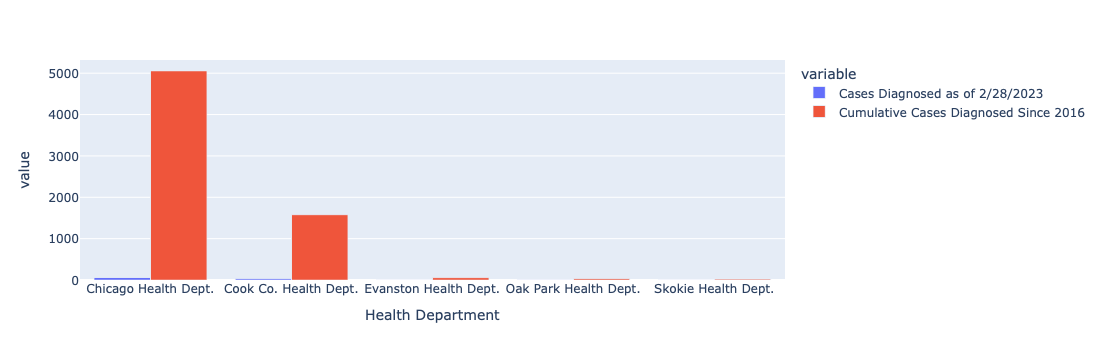

In [111]:
fig = px.bar(df2_Copy, x='Health Department', 
             y=['Cases Diagnosed as of 2/28/2023','Cumulative Cases Diagnosed Since 2016'],
            barmode='group')

fig.show()